# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [4]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [5]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [6]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,229
Treatment,169


col_0,Frequency
status,
Control,0.575377
Treatment,0.424623


<font size = "5">

Query with string conditions

In [7]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [ ]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [9]:
data  = pd.DataFrame([ ])

data["age"]                   = [18,29,15,32,6]
data["num_underage_siblings"] = [0,0,1,1,0]
data["num_adult_siblings"]    = [1,0,0,1,0]

fn_iseligible_vote = lambda age: age >= 18
fn_istwenties      = lambda age: (age >= 20) & (age < 30)
fn_sum             = lambda x,y: x + y

def fn_agebracket(age):
    if (age >= 18):
        status = "Adult"
    elif (age >= 10) & (age < 18):
        status = "Adolescent"
    else:
        status = "Child"
    return(status)

data["can_vote"]    = data["age"].apply(fn_iseligible_vote)
data["in_twenties"] = data["age"].apply(fn_istwenties)
data["age_bracket"] = data["age"].apply(fn_agebracket)



<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [10]:
mean_mpg = carfeatures["mpg"].mean()
carfeatures.query("mpg >= @mean_mpg")
median_mpg = carfeatures["mpg"].median()
stdev_mpg = carfeatures["mpg"].std()

data_threshold_mpg        = carfeatures.query("mpg >= 25")
data_rangeacceleration    = carfeatures.query("(acceleration >= 10) & (acceleration < 18)")

threshold = 25
data_varthreshold_mpg = carfeatures.query("mpg >= @threshold")

#if column names have spaces in them, use "`" symbol
carfeatures["new variable"] = carfeatures["mpg"]
data_spacesthreshold_mpg = carfeatures.query("`new variable` >= 25")

data_mpg_cylinders = carfeatures.query("(mpg >= 25) and (cylinders == 8)")

mpg_threshold = 25
cylinders_threshold = 8
data_mpg_cylinders = carfeatures.query("(mpg >= @mpg_threshold) and (cylinders == @cylinders_threshold)")


<font size = "5">

(c) Use sorting + ".iloc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [ ]:
car_ascendingmpg = carfeatures.sort_values(by = "mpg",ascending = True)
display(car_ascendingmpg.iloc[0:5,0:])

<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [ ]:
list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)
display(carfeatures)

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)
display(frequency_table)
display(proportions_table)

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [13]:
x = pd.mean(data_treated["mpg"])
y = pd.mean(data_control["mpg"])

def my_function(x,y,b0,b1):
    line = b0 + b1*x + y
    return line



28.96934673366835

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

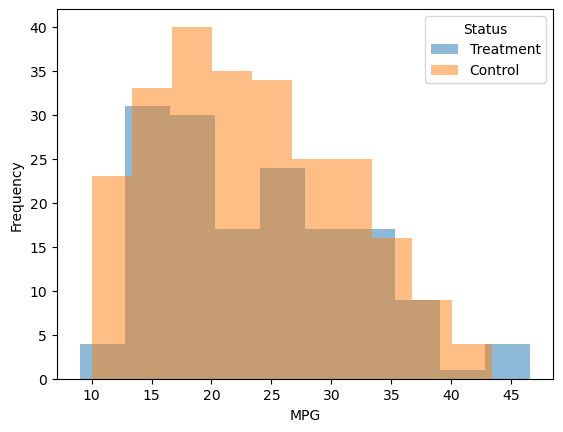

In [38]:
unique_status = pd.unique(carfeatures["status"])

for category in unique_status:
    dataframe = carfeatures.query("status == @category")
    plt.hist(dataframe["mpg"], alpha = 0.5)

plt.xlabel("MPG")
plt.ylabel("Frequency")
plt.legend(labels = unique_status,
           title  = "Status")
plt.show()